In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

### Info and download dataset 

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## Load Data

In [5]:
df = pd.read_csv('cancer_data.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
# Change our Target variabels
# M = Malignant == 1 , B = Benign == 0

df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [7]:
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

### EDA

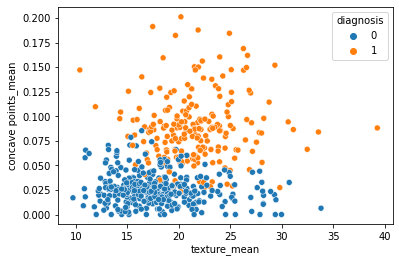

In [13]:
sns.scatterplot(x = 'texture_mean', y = 'concave points_mean', data = df, hue = 'diagnosis');

Checking the relation between our features and target,
Looks kinda linear relation with concave points

In [14]:
# Check missing value
df[['texture_mean', 'concave points_mean']].isnull().sum()

texture_mean           0
concave points_mean    0
dtype: int64

## 2. Spliting Data Set and Define X and y

In [10]:
# Define X and y
features = ['texture_mean', 'concave points_mean']
target = ['diagnosis']

X = df[features]
y = df[target]

In [15]:
# Spliting Data Set

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    stratify = y, # is used to keep the proportion of each class in accordance with the overall data
    test_size = 0.2, # size from test set
    random_state = 42  # is used so that the resulting output remains the same even if it is run repeatedly
    )

## 3 .Find the best K value for the KNN model, 

##      then use  accuracy metric to evaluate the model's performance between KNN without and with scaling.

### Without Scaling

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_predict_class = knn.predict(X_test)

In [19]:
print('Model accuracy in test dataset:', accuracy_score(y_test, y_predict_class))

Model accuracy in test dataset: 0.7719298245614035


### With Scaling

About Min-Max Scaler from sklearn:

Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [21]:
scaler = MinMaxScaler()
scaler.fit(X_train) # preprocess fit, applied only to training data
X_train_scaled = scaler.transform(X_train) # change X_train data
X_test_scaled = scaler.transform(X_test) # change x_test data

In [22]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train) # model fit
y_predict_class = knn.predict(X_test_scaled) # model predict

In [23]:
print('Model accuracy in test dataset:', accuracy_score(y_test, y_predict_class))

Model accuracy in test dataset: 0.9210526315789473


**Accuracy results using the KNN method using only 2 features and a scaling increase from 0.77 to 0.92**

### The best K Factor

In [25]:
df.shape[0]**.5 # searches the range to determine the best K factor by rooting the number of data

23.853720883753127

In [26]:
# Find the best k
k = range(1, 30, 2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scaled, y_train)

    y_predict_train = knn.predict(X_train_scaled)
    training_accuracies.append(accuracy_score(y_train, y_predict_train))

    y_predict_test = knn.predict(X_test_scaled)
    acc_score = accuracy_score(y_test, y_predict_test)
    testing_accuracies.append(acc_score)

    if score < acc_score:
        score = acc_score
        best_k = i

This function will trying every n_neighbors from 1,3,5 etc to 29 and calcualte the result

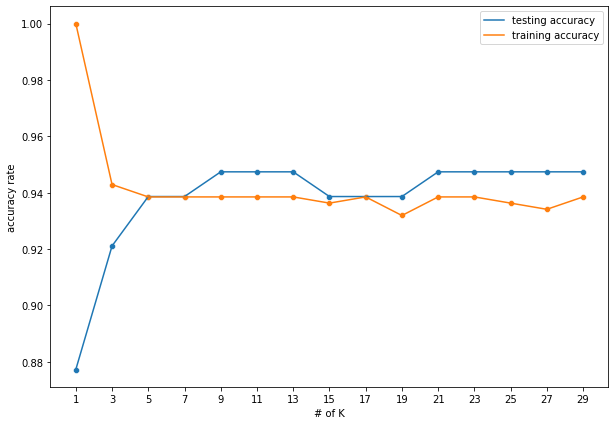

In [27]:
# Plot the accuracies result
plt.figure(figsize=(10, 7))
sns.lineplot(k, testing_accuracies)
sns.scatterplot(k, testing_accuracies)
sns.lineplot(k, training_accuracies)
sns.scatterplot(k, training_accuracies)
plt.legend(['testing accuracy', 'training accuracy'])
plt.xlabel('# of K')
plt.ylabel('accuracy rate')
plt.xticks(list(k))
plt.show()

In [28]:
# The best K with its score
print('Faktor K terbaik =', best_k)
print('Nilai akurasi =', score)

Faktor K terbaik = 9
Nilai akurasi = 0.9473684210526315


### **Interpretation**

From the plot above, it can be seen that the best K is 9 with an accuracy rate of almost 95%. 

The more K, the trend of training and testing accuracy tends to fluctuate and there no one better than K = 9.

## 4. Use the decision tree classifier model (max_depth = 2, criterion = 'gini'), then compare its accuracy against KNN, which one is better

### Without Scaling

In [30]:
# Import Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [31]:
# Define the model
tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=2
)

In [32]:
# Fitting
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [33]:
# Test the model
y_predict_class = tree.predict(X_test)

In [34]:
# Metric result
print('Model accuracy in test dataset:', accuracy_score(y_test, y_predict_class))

Model accuracy in test dataset: 0.8859649122807017


[Text(558.0, 453.0, 'concave points_mean <= 0.056\ngini = 0.468\nsamples = 455\nvalue = [285, 170]\nclass = Malignant'),
 Text(279.0, 271.8, 'concave points_mean <= 0.051\ngini = 0.144\nsamples = 295\nvalue = [272, 23]\nclass = Malignant'),
 Text(139.5, 90.59999999999997, 'gini = 0.108\nsamples = 280\nvalue = [264, 16]\nclass = Malignant'),
 Text(418.5, 90.59999999999997, 'gini = 0.498\nsamples = 15\nvalue = [8, 7]\nclass = Malignant'),
 Text(837.0, 271.8, 'texture_mean <= 15.9\ngini = 0.149\nsamples = 160\nvalue = [13, 147]\nclass = Benign'),
 Text(697.5, 90.59999999999997, 'gini = 0.49\nsamples = 14\nvalue = [8, 6]\nclass = Malignant'),
 Text(976.5, 90.59999999999997, 'gini = 0.066\nsamples = 146\nvalue = [5, 141]\nclass = Benign')]

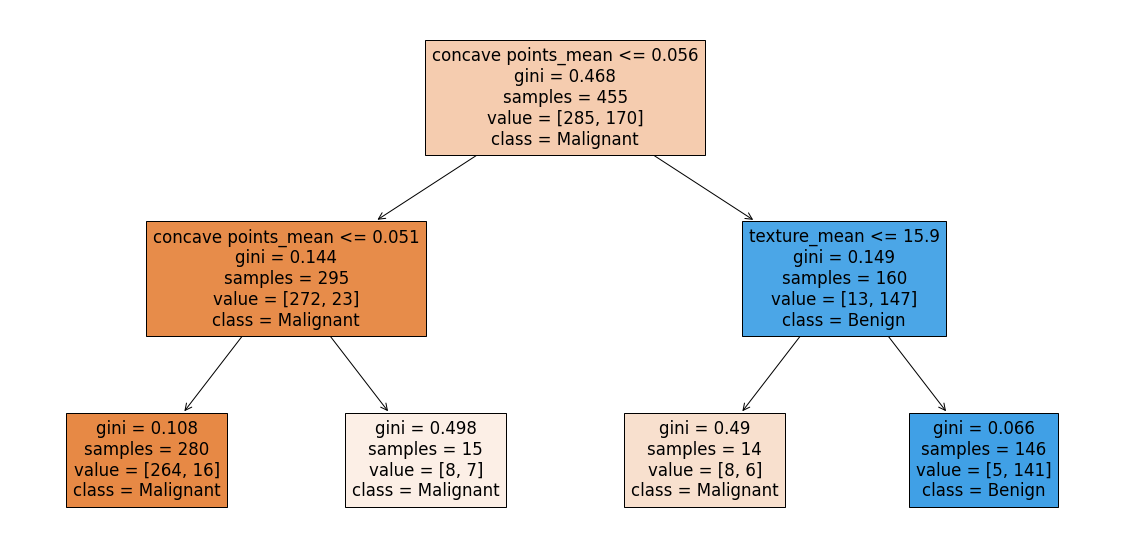

In [37]:
# Tree plot
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names= list(X), class_names= ['Malignant', 'Benign'], filled=True)

## **Interpretation**

**True**
1. concave points_mean <= 0.056, concave points_mean <= 0.051 (True) --> Malignant
2. concave points_mean <= 0.056, concave points_mean <= 0.051 (False) --> Malignant

**False**
1. concave points_mean <= 0.056, texture_mean <= 15.9 (True) --> Malignant
2. concave points_mean <= 0.056, texture_mean <= 15.9 (False) --> Benign

### With Scaling

In [41]:
# Scaling
scaler = MinMaxScaler()
scaler.fit(X_train) # preprocess fit
X_train_scaled = scaler.transform(X_train) # transform data X_train
X_test_scaled = scaler.transform(X_test) # transform data X_test

In [42]:
tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=2
)

In [43]:
# Fit and predict
tree.fit(X_train_scaled, y_train)
y_predict_class = tree.predict(X_test_scaled)

In [44]:
# Metric result
print('Model accuracy in test dataset with scaling:', accuracy_score(y_test, y_predict_class))

Model accuracy in test dataset with scaling: 0.8859649122807017


Accuracy still the same with or without scaling, because scaling not gonna always increase model accuracy

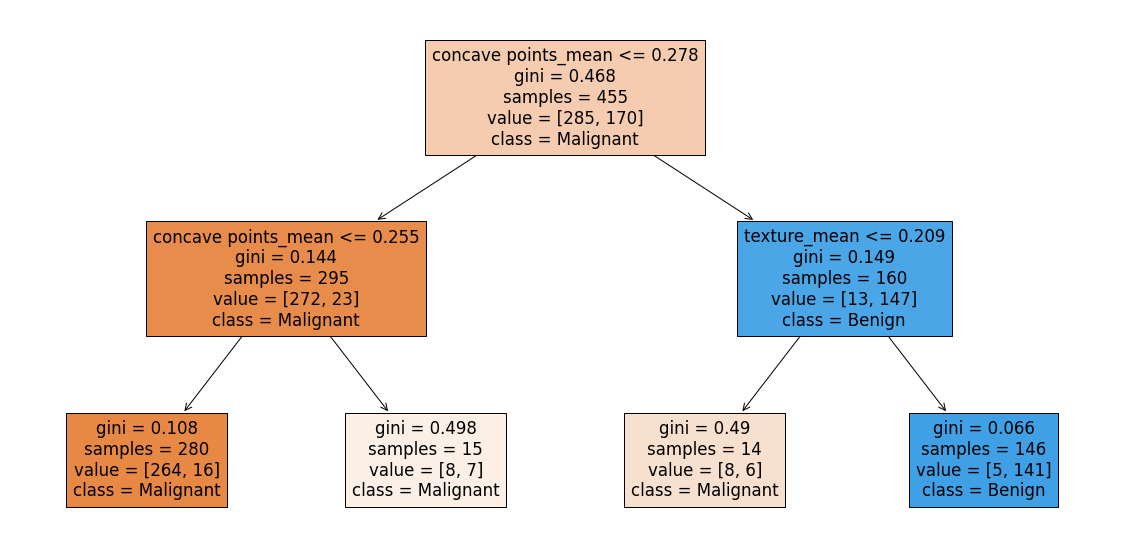

In [45]:
# Tree plot
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names= list(X), class_names= ['Malignant', 'Benign'], filled=True);

### Without max depth

In [47]:
tree = DecisionTreeClassifier(
    criterion='gini'
)

tree.fit(X_train_scaled, y_train)
y_predict_class = tree.predict(X_test_scaled)

In [48]:
print('Model accuracy in test dataset:', accuracy_score(y_test, y_predict_class))

Model accuracy in test dataset: 0.9035087719298246


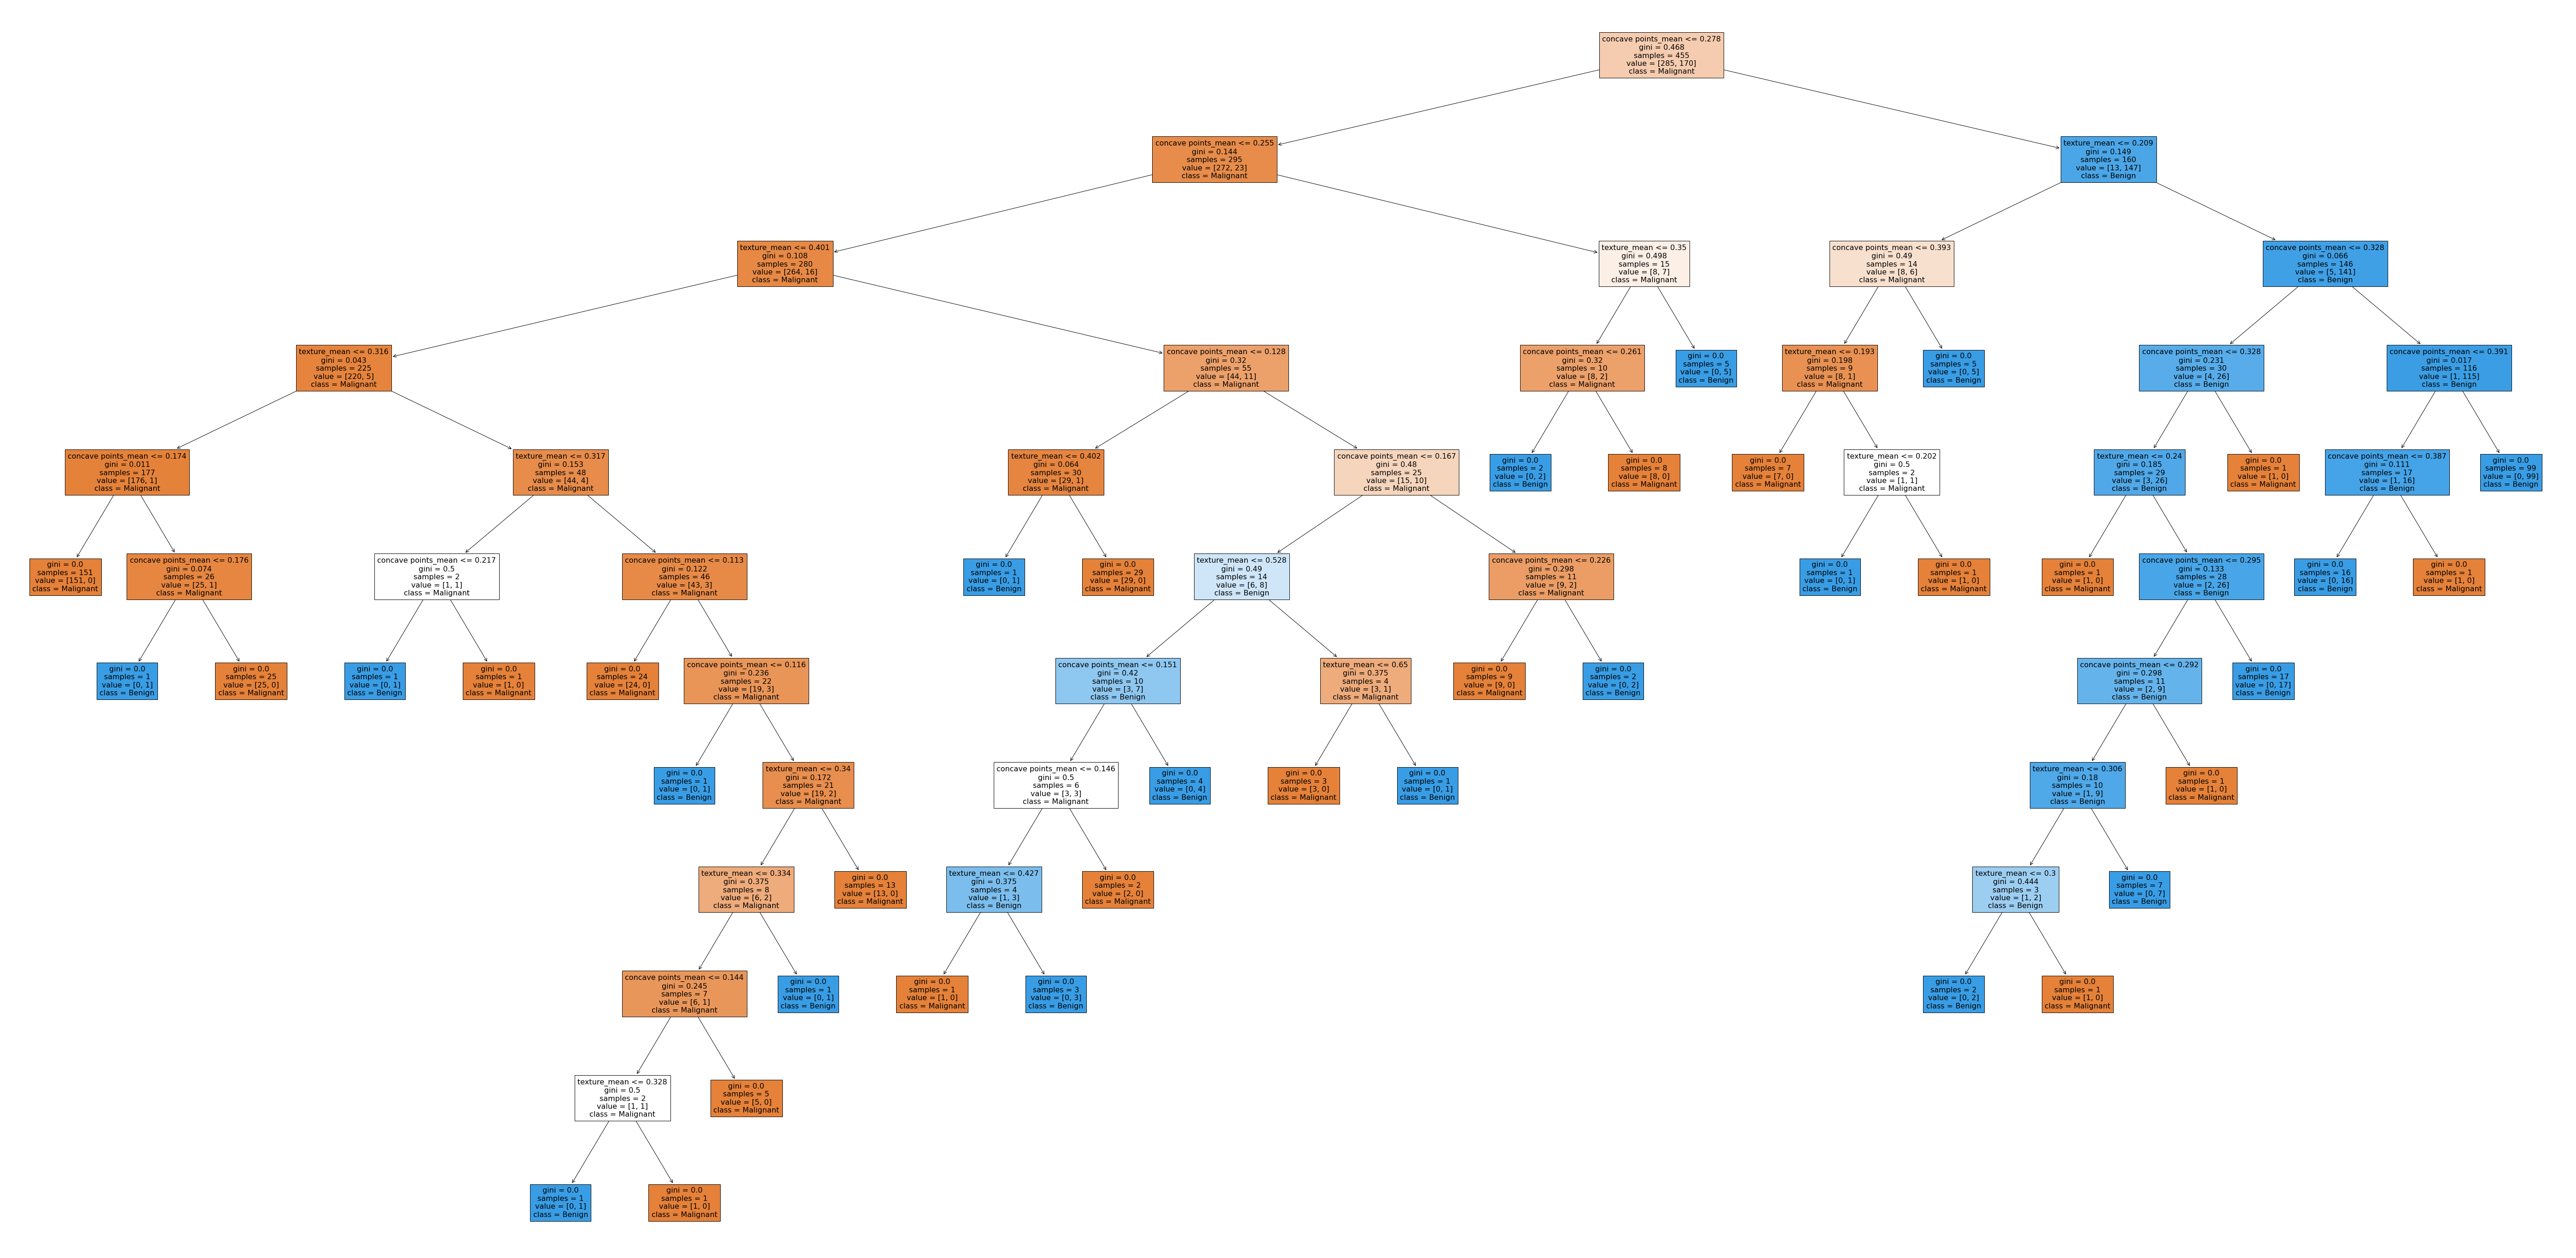

In [49]:
plt.figure(figsize=(100, 50))
plot_tree(tree, feature_names= list(X), class_names= ['Malignant', 'Benign'], filled=True);

## **Interpretation**

By using a decision tree model with a depth = 2, the accuracy obtained is 88.5%. Then, scaling is done, but the accuracy result does not change at all. This happens because even though scaling is done, there is no change in the heterogeneity of the data. In other words, **the decision model does not require scaling.**

An experiment was also carried out without entering the maximum amount of depth. It can be seen in the plot, the automation process performs classification to the 11th depth and the Gini value becomes 0.00 all at the last node. This results in an increase in accuracy to 90%, **but the model becomes increasingly difficult to interpret.**

By referring to the magnitude of the accuracy value, it can be concluded that the **KNN model using scaling is better** than the Decision Tree model for predicting cancer types using only 2 features mean.